In [142]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [143]:
import numpy as np
import pandas as pd

In [144]:
import datetime as dt

## Reflect Tables into AQLAlchemy ORM

In [145]:
#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [146]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [147]:
#Reflect an existing databases into a new model
Base = automap_base()

#Refeclt the tables
Base.prepare(engine, reflect=True)

In [148]:
# We can view all of the classes thart automap found
Base.classes.keys()

['measurement', 'station']

In [149]:
#Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [150]:
#Create oour session (link) from Python to the DB
session = Session(engine)

## PRECIPITATION ANALYSIS

## Exploratory Climate Analysis

In [151]:
#Desing a query to retrieve the last 12 months of precipitation data and plot the results

# Total dates
session.query(func.count(Measurement.date)).all()

[(19550)]

In [152]:
# Earliest Date
earliest_date = session.query(Measurement.date).order_by(Measurement.date).first()
print("Earliest Date:", earliest_date)

Earliest Date: ('2010-01-01',)


In [153]:
# Lastest Date
lastest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Lastest Date:", lastest_date)

Lastest Date: ('2017-08-23',)


In [154]:
# Last 12 months from the last data point in database
Last_12_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Last 12 months:", Last_12_months)

Last 12 months: 2016-08-23


In [155]:
#Perform a query to retrieve the date and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date >= Last_12_months).all()
precipitation_scores

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [156]:
#Save the query results as a Pandas DataFrame and set the index to the date column
precipitation = pd.DataFrame(precipitation_scores,columns=['Date','Precipitation'])
precipitation.set_index('Date', inplace=True)
precipitation.dropna(how='any')
precipitation

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [157]:
#Sort the dataframe by date
precipitation = precipitation.sort_index()
precipitation.head(25)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


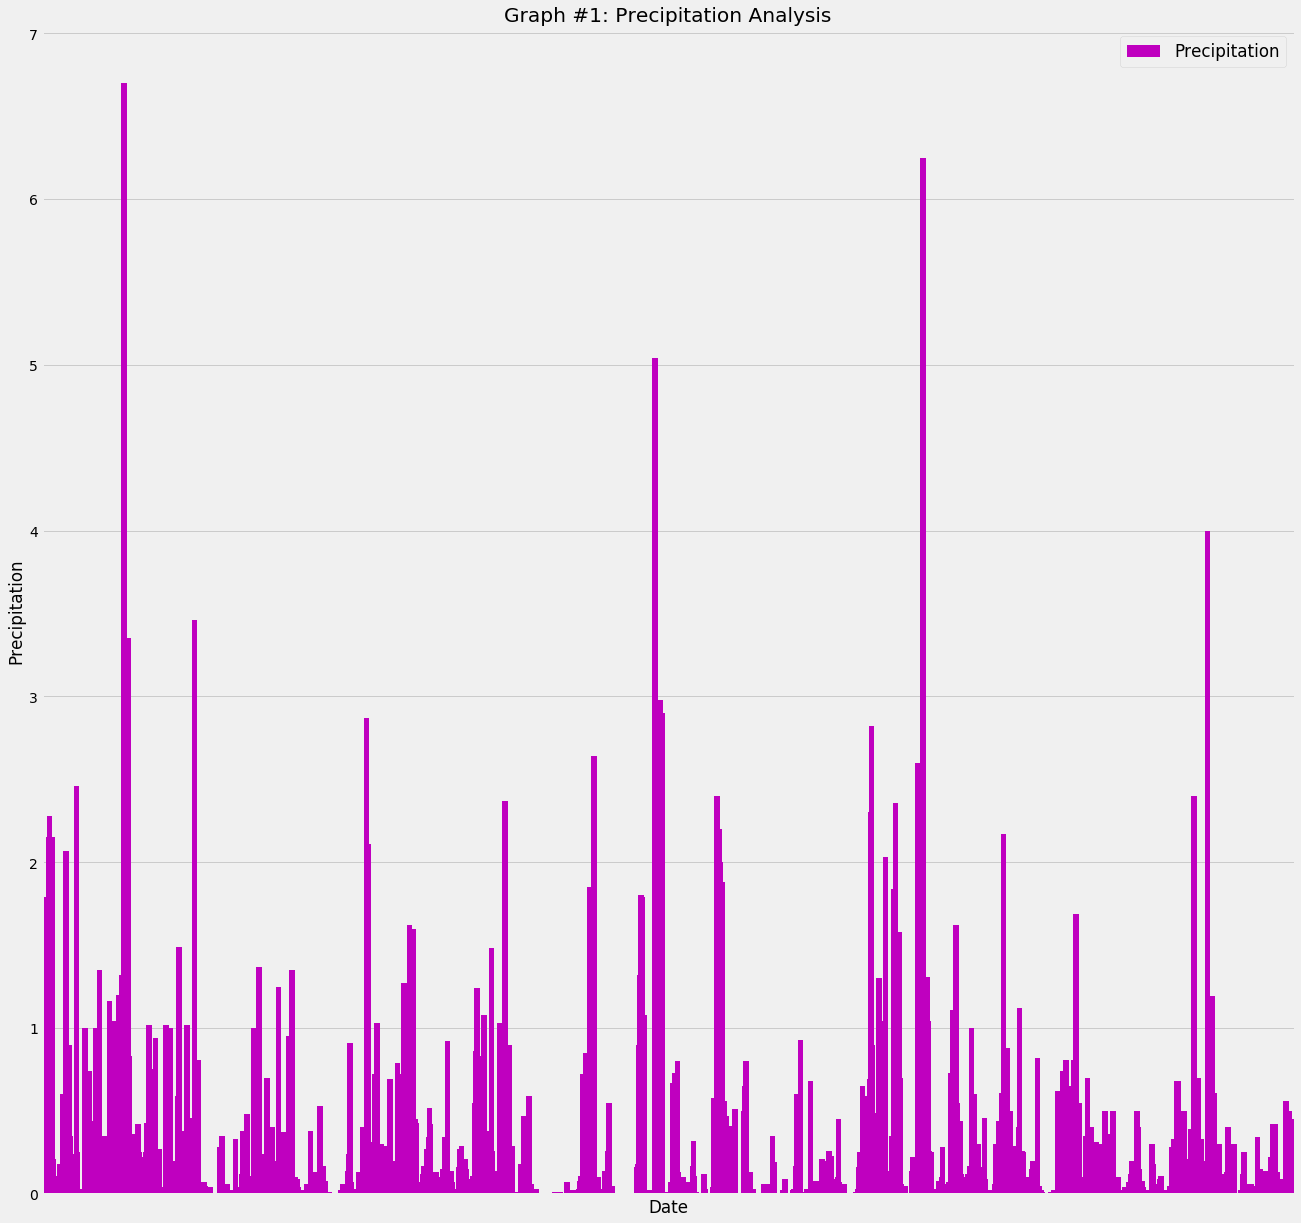

In [158]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precipitation.plot.bar(width = 10, color= "m")
plt.title("Graph #1: Precipitation Analysis")
plt.xlabel('Date')
plt.ylabel('Precipitation')
ax.xaxis.set_major_locator(ticker.NullLocator())
plt.legend(loc="best", fontsize="large", fancybox=True)
plt.grid(True)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.savefig("Images/Graph#1:Precipitation Analysis(1).png")
plt.show()

#Ref: https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html

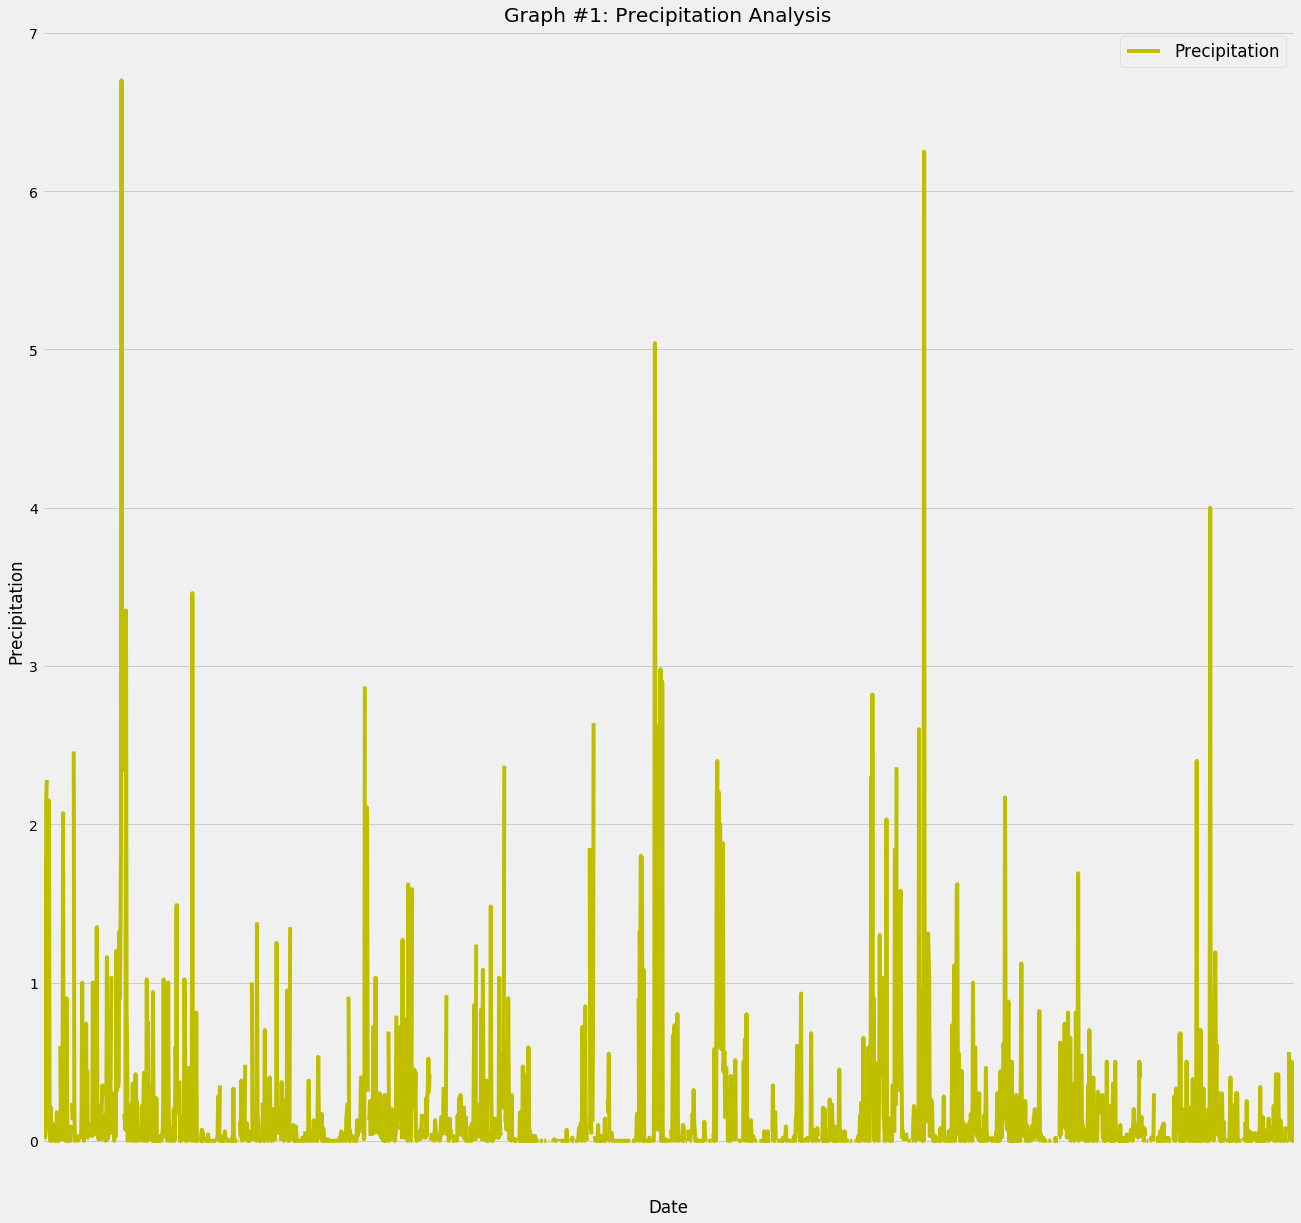

In [159]:
ax = precipitation.plot(rot=90, color='y')
plt.title("Graph #1: Precipitation Analysis")
plt.xlabel('Date')
plt.ylabel('Precipitation')
ax.xaxis.set_major_locator(ticker.NullLocator())
plt.legend(loc="best", fontsize="large", fancybox=True)
plt.grid(True)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.savefig("Images/Graph#1:Precipitation Analysis(2).png")
plt.show()

In [160]:
#Use Pandas to calculate the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## STATION ANALYSIS

In [161]:
# Design a query to show how many stations are available in thso dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [162]:
# What are the most activate stations?(i.e what stations have the most rows)?
# List the stations and the counts in descending order.
activate_stations = session.query(Measurement.station,func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()  
activate_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [163]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most activate station?
results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
            filter(Measurement.station == 'USC00519281').all()
print(results)

[(54.0, 85.0, 71.66378066378067)]


In [164]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as histogram.
activate_station_tobs = session.query(Measurement.station, Measurement.tobs).\
                        filter(Measurement.station == 'USC00519281').\
                        filter(Measurement.date >= Last_12_months).all()
activate_station_tobs

[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [165]:
#DataFrame
activate_station_tobs_df = pd.DataFrame(activate_station_tobs,columns=['Station','Tobs'])
activate_station_tobs_df.set_index('Station', inplace=True)
activate_station_tobs_df.dropna(how='any')
activate_station_tobs_df.head(25)

,Tobs
Station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0
USC00519281,78.0
USC00519281,77.0
USC00519281,78.0


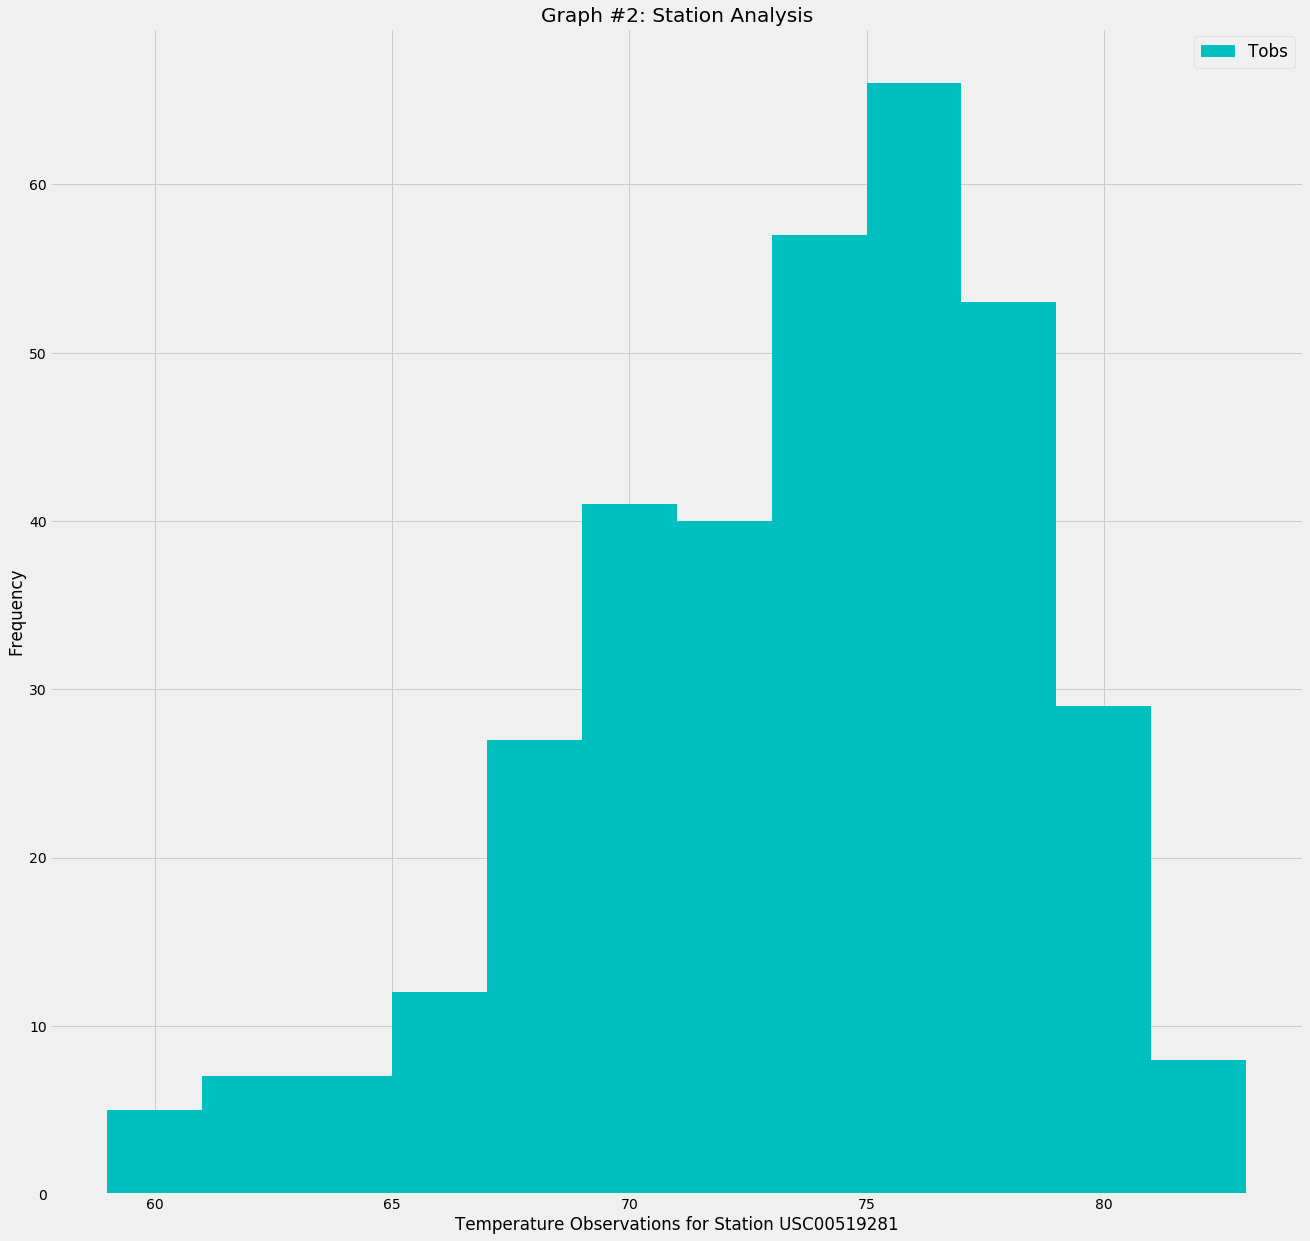

In [166]:
ax = activate_station_tobs_df.plot.hist(bins = 12, color= "c")
plt.title("Graph #2: Station Analysis")
plt.xlabel('Temperature Observations for Station USC00519281')
plt.ylabel('Frequency')
plt.legend(loc="best", fontsize="large", fancybox=True)
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.savefig("Images/Graph#2:Station Analysis.png")
plt.show()

## OPTIONAL: Other Recommended Analyses

## Temperature Analysis I

In [167]:
# Average temperature in June at all stations across all available years in the dateset. 
sel = [Measurement.station, func.avg(Measurement.tobs)]
date_str = "06"
jun_averages = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == date_str).\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
jun_averages

[('USC00511918', 74.13939393939394),
 ('USC00513117', 74.05084745762711),
 ('USC00514830', 76.00537634408602),
 ('USC00516128', 71.9372197309417),
 ('USC00517948', 76.6554054054054),
 ('USC00518838', 73.39473684210526),
 ('USC00519281', 73.27118644067797),
 ('USC00519397', 77.55932203389831),
 ('USC00519523', 76.66810344827586)]

In [168]:
# Average temperature in December at all stations across all available years in the dateset. 
sel = [Measurement.station, func.avg(Measurement.tobs)]
date_str = "12"
dec_averages = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == date_str).\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
dec_averages

[('USC00511918', 69.6842105263158),
 ('USC00513117', 71.06944444444444),
 ('USC00514830', 73.2247191011236),
 ('USC00516128', 69.29126213592232),
 ('USC00517948', 71.8348623853211),
 ('USC00518838', 72.42105263157895),
 ('USC00519281', 69.90322580645162),
 ('USC00519397', 71.10952380952381),
 ('USC00519523', 72.43333333333334)]

In [169]:
# Statistical analysis
from scipy import stats

In [170]:
# List of June average at all stations across all available years.
june_avg = [result[1] for result in jun_averages]
june_avg 

[74.13939393939394,
 74.05084745762711,
 76.00537634408602,
 71.9372197309417,
 76.6554054054054,
 73.39473684210526,
 73.27118644067797,
 77.55932203389831,
 76.66810344827586]

In [171]:
# List of December average at all stations across all available years.
december_avg = [result[1] for result in dec_averages]
december_avg 

[69.6842105263158,
 71.06944444444444,
 73.2247191011236,
 69.29126213592232,
 71.8348623853211,
 72.42105263157895,
 69.90322580645162,
 71.10952380952381,
 72.43333333333334]

In [172]:
# Use the t-test to determine whether the diffrence in the means, if any, is statistically significant.
stats.ttest_ind(june_avg, december_avg) 

Ttest_indResult(statistic=4.615865424404701, pvalue=0.00028626292761018595)

## Temperature Analysis II

In [173]:
#This function called 'calc_temps' will accept start date and end date in the format 'Y%-%m%d' and return
# the minimum, average , and maximum temperatures for the range of dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [174]:
# Use your previous function 'calc_temps' to calculate the tmin, tavg, and tmax for your trip 
# using the previous year's data for those same days. My trip days: 2016-10-05 --> 2016-10-15
My_trip = calc_temps('2016-10-05', '2016-10-15')
My_trip

[(71.0, 77.65217391304348, 82.0)]

In [175]:
# Plot the results from your previous query as a bar chart
# Use "Trip Avg Temp" as your title
# Use the average temperature for the y value
# Use the peak-peak (tmax-tmin) value as the y error bar (yerr)
# DataFrame
My_trip_df = pd.DataFrame(My_trip,columns=['Min Temp','Avg Temp', 'Max Temp'])
My_trip_df

,Min Temp,Avg Temp,Max Temp
0,71.0,77.652174,82.0


In [176]:
# Y error bar (tmax-tmin)
tmax_tmin = My_trip_df['Max Temp'] - My_trip_df['Min Temp']
tmax_tmin

0    11.0
dtype: float64

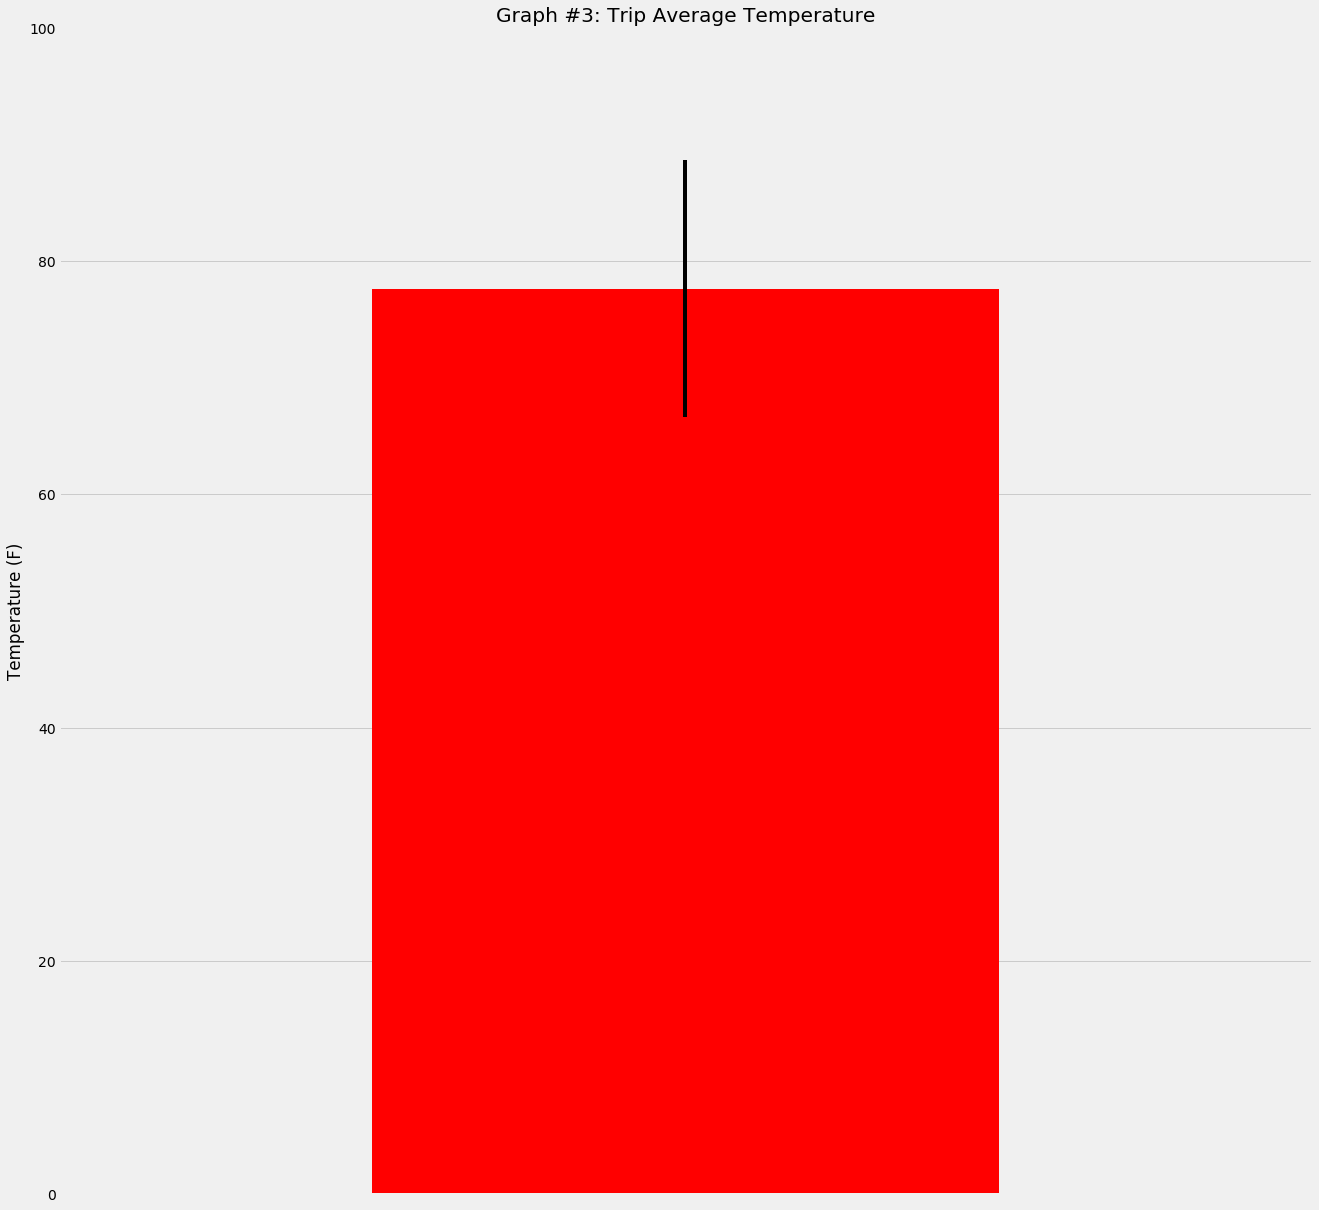

In [177]:
# Bar Chart "Trip Avg Temp"
ax = My_trip_df['Avg Temp'].plot.bar(color= "r", yerr= tmax_tmin)
plt.title("Graph #3: Trip Average Temperature")
plt.ylabel('Temperature (F)')
ax.xaxis.set_major_locator(ticker.NullLocator())
plt.grid(True)
plt.ylim(0,100)
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.savefig("Images/Graph#3:Trip Avg Temp.png")
plt.show()

## Daily Rainfall Average

In [178]:
# Calculate the total amount of rainfall per weather station for your trip dates 
# using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, 
# name, latitude, longitude, and elevation.
rainfall = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp),).\
            filter(Measurement.date >= '2016-10-05').\
            filter(Measurement.date <= '2016-10-15').\
            filter(Measurement.station == Station.station).\
            group_by(Measurement.station).\
            order_by(func.sum(Measurement.prcp).desc()).all()
rainfall

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  1.6600000000000001),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.36000000000000004),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.1),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.08),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.07),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.0)]

In [179]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [180]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
#normals =[]

# Set the start and end date of the trip
#days = ['10-05', '10-15']

# Use the start and end date to create a range of dates
#for day in days:
 #   daily_normals
  #  normals.append(daily_normals)
#print(normals) 

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date